<a href="https://colab.research.google.com/github/albertopolini/DSIM/blob/main/EDSIM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

In [ ]:
im = io.imread('redpanda.png')

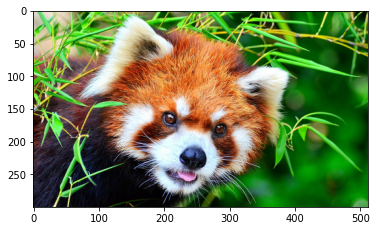

In [ ]:
plt.imshow(im)

In [ ]:
type(im)

numpy.ndarray

In [ ]:
# la terza dimensione indica 4 canali: red, green, blue, alpha channel. 
im.shape

(300, 512, 4)

Osserviamo un canale alla volta

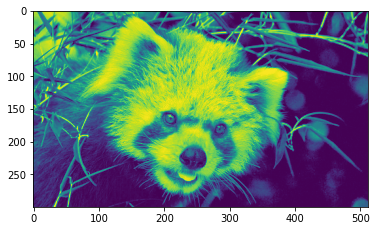

In [ ]:
plt.imshow(im[:,:,0])

Lo strumento di visualizzazione mostra i valori bassi col blu scuro e quelli alti col giallo

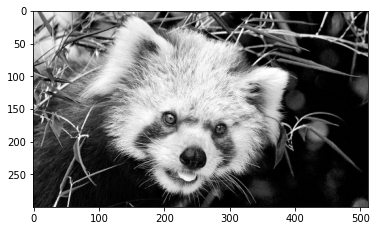

In [ ]:
plt.imshow(im[:,:,0], cmap='gray')

Visualizziamo tutti e tre i canali

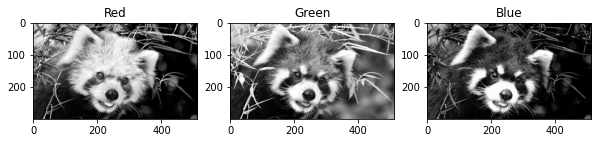

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3, 1)
plt.title('Red')
plt.imshow(im[:,:,0], cmap='gray')

plt.subplot(1,3, 2)
plt.title('Green')
plt.imshow(im[:,:,1], cmap='gray')

plt.subplot(1,3, 3)
plt.title('Blue')
plt.imshow(im[:,:,2], cmap='gray')

Le parti bianche hanno alte porzioni di rosso, verde e blu

# Grayscale import

In [13]:
im = io.imread('redpanda.png', as_gray=True)

Text(0.5, 1.0, 'Grayscale')

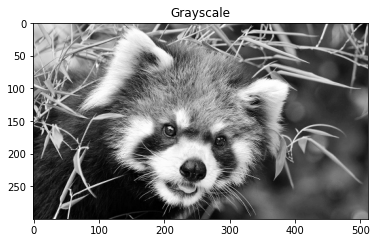

In [17]:
plt.imshow(im, cmap='gray'); plt.title('Grayscale')

In [16]:
im.shape

(300, 512)

Non abbiamo più informazioni relative al colore

Text(0.5, 1.0, 'Grayscale')

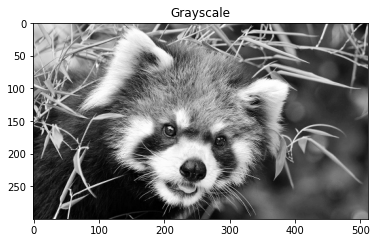

In [18]:
plt.imshow(im, cmap='gray'); plt.clim(0,1); plt.title('Grayscale')

# Exercize

In [19]:
# Load church.jpg
# Visualize it with plt.clim(0,1)
# Increase the brightness

In [36]:
church = io.imread('church.jpg', as_gray=True)

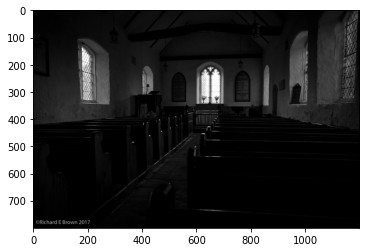

In [37]:
plt.imshow(church, cmap='gray'); plt.clim(0,1)

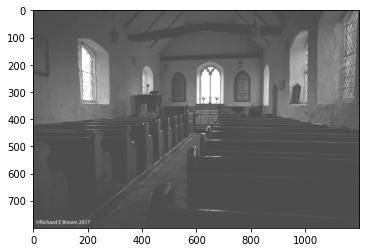

In [38]:
plt.imshow(church + 0.3, cmap='gray'); plt.clim(0,1)

Usando la somma abbiamo perso un sacco di informazione, basta ad esempio guardare le finistre

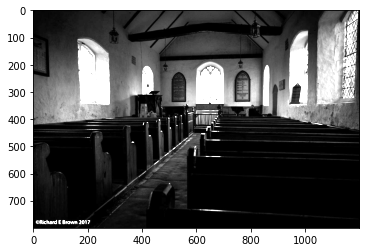

In [41]:
plt.imshow(church * 4, cmap='gray'); plt.clim(0,1)

Moltiplicando abbiamo perso ancora informazioni, nonostante l'immagine sia più chiara

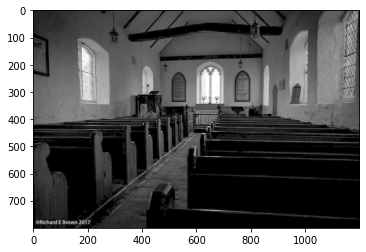

In [42]:
plt.imshow(church ** 0.4, cmap='gray'); plt.clim(0,1)

L'elevamento a potenza permette di schiarire l'immagine senza perdere informazione.

Questo tipo di correzione si chiama **Gamma correction**.

L'effetto di questo tipo di correzione ha effetto quando si è nell'intervallo [0,1]. 

Per applicare la gamma correction a immagini tra [0,255] devo prima portarmi in [0,1]

# Manipolazioni delle immagini

## Rescaling/Resizing

In [43]:
church.shape

(800, 1200)

In [46]:
# Riduzione del 20%

new_shape = (int(church.shape[0]*.2), int(church.shape[1]*.2))

In [47]:
new_shape

(160, 240)

In [48]:
church_small = transform.resize(church, output_shape=new_shape)

In [49]:
church_small.shape

(160, 240)

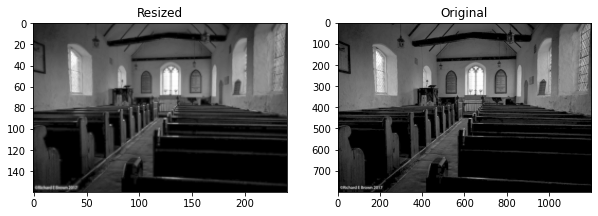

In [53]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Resized')
plt.imshow(church_small**0.4, cmap='gray'); plt.clim(0,1)

plt.subplot(1,2,2)
plt.title('Original')
plt.imshow(church**0.4, cmap='gray'); plt.clim(0,1)

#Exercize

In [54]:
# Sovrapporre immagine piccola a quella grande in una certa posizione
# Usare indicizzazione di array

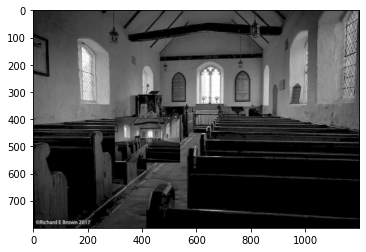

In [67]:
im_over = church.copy()
im_over[400:400+church_small.shape[0], 300:300+church_small.shape[1]] = church_small
plt.imshow(im_over**0.4, cmap='gray'); plt.clim(0,1)

## Elaborazione locale (filtering)

In [69]:
im = church ** 0.5

In [70]:
# Filtro rilevamento edges

In [72]:
im_edge = filters.sobel(im)

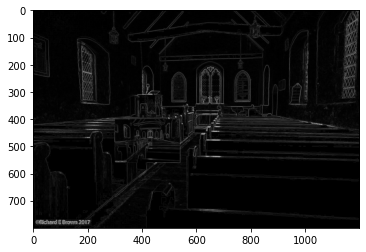

In [74]:
plt.imshow(im_edge, cmap=('gray'))

# Gestione colore

## HSV

In [75]:
im = io.imread('redpanda.png')

In [78]:
# Transition from grb to hsv

im_hsv = color.rgb2hsv(im[:,:,0:3])

In [80]:
im_hsv.shape

(300, 512, 3)

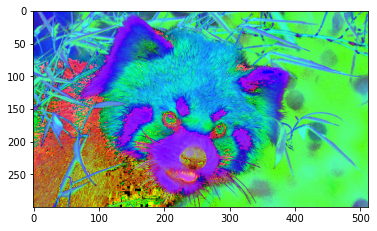

In [79]:
plt.imshow(im_hsv)

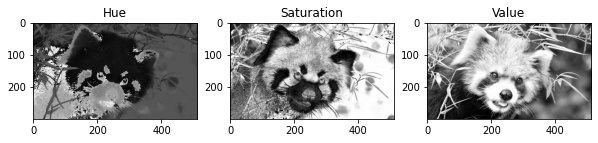

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Hue")
plt.imshow(im_hsv[:,:,0], cmap='gray')

plt.subplot(1,3,2)
plt.title("Saturation")
plt.imshow(im_hsv[:,:,1], cmap='gray')

plt.subplot(1,3,3)
plt.title("Value")
plt.imshow(im_hsv[:,:,2], cmap='gray')

# Assignment

Compressione delle immagini:

1. immagine custom
2. convertire in YCbCr
3. Sfocare (filtro gaussiano) Cb e Cr
4. Visualizzare Y, Cb sfuocato e Cr sfuocato e immagine RGB ricostruita
5. Sfuocare solo Y
6. Visualizzare Y sfuocato, Cb e Cr e ricostruire RGB

7. Sperimentare con diverse entità del filtro gaussiano